# 데이터 프레임 출력

In [8]:
raw_processed

,soyoil_log,soybean_log,palm_stock_log,soy_palm_spread_log,palm_brent_spread_log,dollar_log
date,,,,,,
2005-01-01,6.074029,6.277606,14.230276,4.475912,0.062175,4.421053
2005-02-01,6.093251,6.287394,14.245283,4.555575,0.027453,4.427830
2005-03-01,6.239506,6.454823,14.178411,4.914108,-0.039596,4.416659
2005-04-01,6.210951,6.433897,14.213500,4.798971,-0.038966,4.433698
2005-05-01,6.216536,6.454225,14.074260,4.874528,0.011611,4.449980
...,...,...,...,...,...,...
2021-12-01,7.104391,7.164509,14.274858,4.761053,0.693755,4.566188
2022-01-01,7.197857,7.248024,14.254508,4.630509,0.676812,4.563696
2022-02-01,7.296857,7.369758,14.233061,4.734188,0.677150,4.564265


# 함수 실행

<최적 시차 조합 bset 10>


,AIC,abs_AIC,factor1_log_n,factor2_log_n,factor3_log_n,factor4_log_n,factor5_log_n
7739,-47.687642,47.687642,11,11,10,11,11
7523,-47.765391,47.765391,11,10,10,11,11
6443,-47.860961,47.860961,10,11,10,11,11
7775,-47.906280,47.906280,11,11,11,11,11
7487,-47.945327,47.945327,11,10,9,11,11
7559,-47.982055,47.982055,11,10,11,11,11
6227,-47.990153,47.990153,10,10,10,11,11
7703,-48.107754,48.107754,11,11,9,11,11
6479,-48.127555,48.127555,10,11,11,11,11
6191,-48.164391,48.164391,10,10,9,11,11


factor1의 최적 시차는 11 입니다
factor2의 최적 시차는 11 입니다
factor3의 최적 시차는 10 입니다
factor4의 최적 시차는 11 입니다
factor5의 최적 시차는 11 입니다


 <최적 시차를 적용한 다변량 회귀분석 결과>


,표시,최적시차,p-values,coefficient
soybean_log,factor1,11,1.861959e-01,0.102941
palm_stock_log,factor2,11,3.688893e-02,-0.174116
soy_palm_spread_log,factor3,10,9.652805e-01,0.001322
palm_brent_spread_log,factor4,11,3.240461e-12,0.549127
dollar_log,factor5,11,4.039943e-08,-1.348659


 <잔차 진단 결과물>


<잔차 확인>


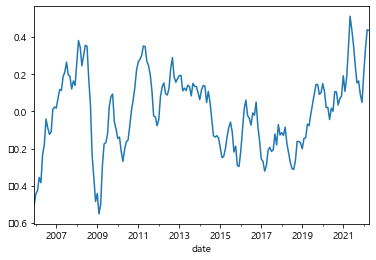



잔차 ACF/PACF


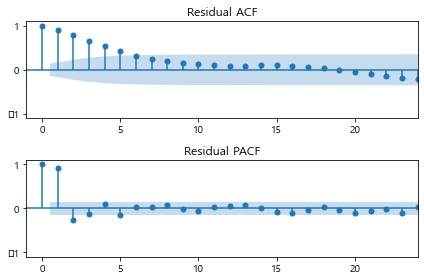

,설명
ADF test H0,비정상 상태/시간의존 구조
H0 기각 O,정상성 확보
H0 기각 X,비정상 상태


,Stationarity_adf
Test Statistics,-4.164274
p-value,0.000757
Used Lag,4.000000
Used Observations,192.000000
Critical Value(1%),-3.464875
Maximum Information Criteria,-465.377203


,설명
KPSS test H0,정상 상태/시간 비의존 구조
H0 기각 O,비정상성 상태
H0 기각 X,정상성 확보


,Stationarity_kpss
Test Statistics,0.104507
p-value,0.100000
Used Lag,15.000000
Critical Value(10%),0.347000







 <Shap Value를 활용한 변수 중요도 분석>


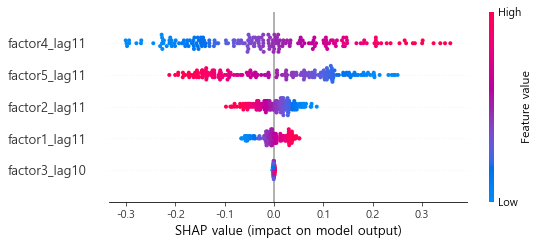

그래프 상 특성은 예측에 미치는 영향력(중요도)에 따라서 정렬됨
예측에 영향을 미치는 순서는 위에서 순서대로


,factor1,factor2,factor3,factor4,factor5
명칭,soybean_log,palm_stock_log,soy_palm_spread_log,palm_brent_spread_log,dollar_log


{'model': LinearRegression()}

In [9]:
import lch_lag.mvr_total_test as mvr
mvr.mvr_findlag(raw_processed, var_number=5, start_lag=6, end_lag=12, resid_test=1, shap_value_test=1)

In [7]:
test_code= {'soyoil': '06_02_00_00_01_00_1103_NO', 
            'soybean': '06_01_00_00_01_00_1103_NO',
             'palmoil': '06_02_00_00_02_01_1446_NO',
             'myr_usd': 'MYR_USD',
             'palm_stock': '02_03_03_HB_00_00_MYS_00_84_04',
             'brent': '02_01_01_00_02_00_1301_NO',
            'dollar': '01_02_02_03_05_05_USA_00_251_06'
            }


x = k.KDB(code=test_code, info_print=False)
raw = x.df()



# # brent oil unit change(bbl -> ton)
raw['brent'] = raw['brent']/0.136

# soyoil unit (pound -> ton)
raw['soyoil'] = raw['soyoil']/0.000454/100

# fx adjusting
raw['palmoil'] = raw['palmoil']/raw['myr_usd']

# soyoil-palmoil spread calculation
raw['soy_palm_spread'] = raw['soyoil']-raw['palmoil']

# palm-gasoil spread calculation
raw['palm_brent_spread'] = np.log(np.array(raw['palmoil'])) - np.log(np.array(raw['brent']))



feature = ['soyoil', 'soybean', 'palm_stock', 'soy_palm_spread', 'palm_brent_spread', 'dollar']
raw = raw[feature]


# 모든 변수에 대해서 log 변환
raw['soyoil_log'] = pd.DataFrame(np.log(np.array(raw['soyoil'])), index=raw.index)
raw['soybean_log'] = pd.DataFrame(np.log(np.array(raw['soybean'])), index=raw.index)
raw['palm_stock_log'] = pd.DataFrame(np.log(np.array(raw['palm_stock'])), index=raw.index) 
raw['soy_palm_spread_log'] = pd.DataFrame(np.log(np.array(raw['soy_palm_spread'])), index=raw.index)
# raw['palm_brent_spread_log'] = pd.DataFrame(np.log(np.array(raw['palm_brent_spread'])), index=raw.index)  #마이너스가 있어서 MoM으로 변환함
raw['palm_brent_spread_log'] = raw['palm_brent_spread']
raw['dollar_log'] = pd.DataFrame(np.log(np.array(raw['dollar'])), index=raw.index)
raw_processed = raw.copy()
raw_processed = raw_processed.loc['2005':, 'soyoil_log':'dollar_log']
raw_processed

,soyoil_log,soybean_log,palm_stock_log,soy_palm_spread_log,palm_brent_spread_log,dollar_log
date,,,,,,
2005-01-01,6.074029,6.277606,14.230276,4.475912,0.062175,4.421053
2005-02-01,6.093251,6.287394,14.245283,4.555575,0.027453,4.427830
2005-03-01,6.239506,6.454823,14.178411,4.914108,-0.039596,4.416659
2005-04-01,6.210951,6.433897,14.213500,4.798971,-0.038966,4.433698
2005-05-01,6.216536,6.454225,14.074260,4.874528,0.011611,4.449980
...,...,...,...,...,...,...
2021-12-01,7.104391,7.164509,14.274858,4.761053,0.693755,4.566188
2022-01-01,7.197857,7.248024,14.254508,4.630509,0.676812,4.563696
2022-02-01,7.296857,7.369758,14.233061,4.734188,0.677150,4.564265


In [ ]:
mvr.mvr_findlag()